In [ ]:
!kaggle datasets list

ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset   Global Earthquake-Tsunami Risk Assessment Dataset        16151  2025-10-01 16:35:53.273000          13195        459  1.0              
jockeroika/life-style-data                                     Life Style Data                                        3995645  2025-10-14 13:50:45.303000          15481        324  0.8235294        
jaderz/hospital-beds-management                                Hospital Beds Management                                 47583  2025-10-03 09:21:58.590000          10846        281  1.0              
ahmad

In [ ]:
!pip install -q kaggle
from google.colab import files
print("Upload your kaggle.json file:")
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API key setup complete!")

Upload your kaggle.json file:


Saving kaggle.json to kaggle (2).json
Kaggle API key setup complete!


In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset -p /tmp --unzip

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 84% 665M/788M [00:00<00:00, 1.66GB/s]
100% 788M/788M [00:00<00:00, 1.66GB/s]


In [ ]:
!pip install -q opencv-python
!pip install -q tensorflow

In [ ]:
from PIL import Image
import cv2
import os
import numpy as np
import shutil
import pathlib

# Dataset paths
cat_source = '/tmp/PetImages/Cat'
dog_source = '/tmp/PetImages/Dog'

cat_files = [os.path.join(cat_source, f) for f in os.listdir(cat_source)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
dog_files = [os.path.join(dog_source, f) for f in os.listdir(dog_source)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(cat_files)} cat images and {len(dog_files)} dog images")

def is_valid_cv_image(filepath):
    try:
        img = cv2.imread(filepath)
        if img is None:
            return False
        h, w, c = img.shape
        if c != 3 or h < 50 or w < 50:
            return False
        return True
    except:
        return False

valid_cat_files = [f for f in cat_files if is_valid_cv_image(f)]
valid_dog_files = [f for f in dog_files if is_valid_cv_image(f)]

print(f"Valid images - Cats: {len(valid_cat_files)}, Dogs: {len(valid_dog_files)}")
print(f"Removed corrupted images: {(len(cat_files)+len(dog_files))-(len(valid_cat_files)+len(valid_dog_files))}")

def fix_image(filepath):
    try:
        img = Image.open(filepath).convert('RGB')
        img.save(filepath, 'JPEG')
        return True
    except:
        os.remove(filepath)
        return False

for f in valid_cat_files + valid_dog_files:
    fix_image(f)

base_dir = '/tmp/organized_dataset'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.makedirs(base_dir, exist_ok=True)

for split in ['training', 'validation']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

np.random.seed(42)
np.random.shuffle(valid_cat_files)
np.random.shuffle(valid_dog_files)

# 90% training, 10% validation
cat_training = valid_cat_files[:int(len(valid_cat_files)*0.9)]
cat_val = valid_cat_files[int(len(valid_cat_files)*0.9):]
dog_training = valid_dog_files[:int(len(valid_dog_files)*0.9)]
dog_val = valid_dog_files[int(len(valid_dog_files)*0.9):]

for src_list, split, category in [
    (cat_training, 'training', 'cats'), (cat_val, 'validation', 'cats'),
    (dog_training, 'training', 'dogs'), (dog_val, 'validation', 'dogs')
]:
    for src in src_list:
        dst = os.path.join(base_dir, split, category, os.path.basename(src))
        try:
            shutil.copy(src, dst)
        except:
            pass

print(f"Training images: {len(cat_training)+len(dog_training)}")
print(f"Validation images: {len(cat_val)+len(dog_val)}")

# Remove non-image files
def remove_non_images(directory):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    removed = 0
    for path in pathlib.Path(directory).rglob('*'):
        if path.is_file() and path.suffix.lower() not in valid_extensions:
            print(f"Removing non-image file: {path}")
            path.unlink()
            removed += 1
    print(f"Removed {removed} non-image files from {directory}\n")

remove_non_images(base_dir)

from PIL import Image

for split in ['training', 'validation']:
    for category in ['cats', 'dogs']:
        folder = os.path.join(base_dir, split, category)
        for fname in os.listdir(folder):
            fpath = os.path.join(folder, fname)
            try:
                img = Image.open(fpath)
                img.verify()
            except:
                print("invalid:", fpath)

Found 12500 cat images and 12500 dog images
Valid images - Cats: 12491, Dogs: 12491
Removed corrupted images: 18
Training images: 22482
Validation images: 2500
Removed 0 non-image files from /tmp/organized_dataset



======================================================

Experiment 1 - FROM SCRATCH WITH 1000 SAMPLES

======================================================

Dataset created: 1000 training, 500 val, 500 test
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.4816 - loss: 0.7213 - val_accuracy: 0.5000 - val_loss: 0.7119
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4895 - loss: 0.6972 - val_accuracy: 0.5000 - val_loss: 0.7038
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4928 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4978 - loss: 0.6941 - val_accuracy: 0.5460 - val_loss: 0.6925
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4991 - loss: 0.6927 - val_accuracy: 0.5180 - val_loss: 0.6926
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4714 - loss: 0.6935 - val_accuracy: 0.5900 - val_loss: 0.6894
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5410 - loss: 0.6934 - val_accuracy: 0.5920 - val_loss: 0.6876
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5095 - loss: 0.6910 - val_accuracy: 0.5460 - v

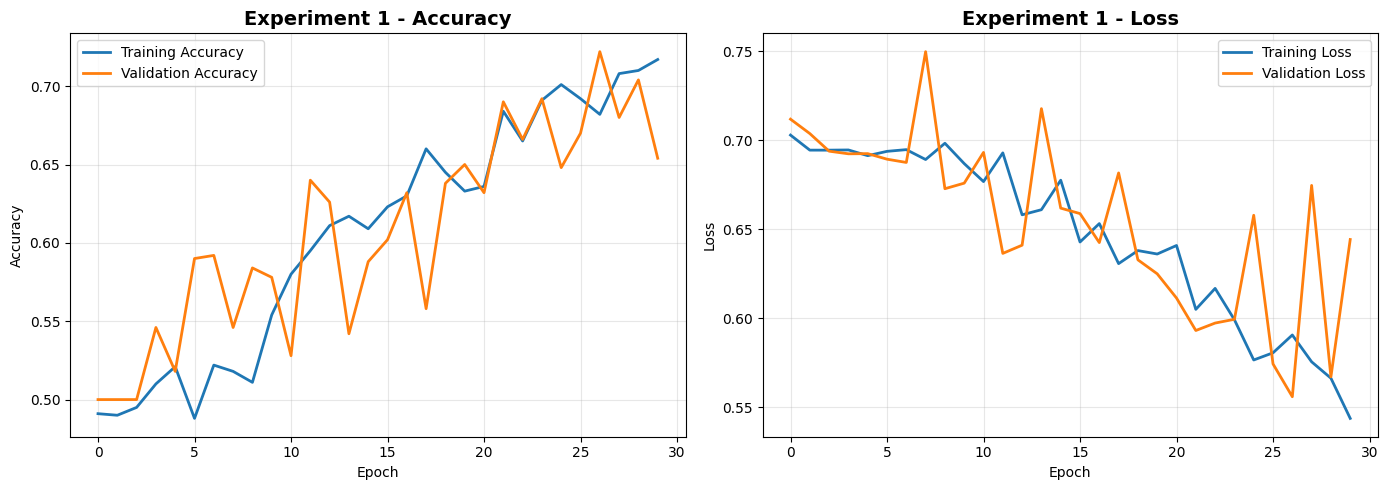

In [ ]:
# Store results
results = []

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

training_size = 1000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_1000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    files_per_category_training = training_size // 2
    files_per_category_test = test_size // 2
    files_per_category_val = val_size // 2

    training_files = all_training_files[:files_per_category_training]
    test_files = all_training_files[files_per_category_training:files_per_category_training + files_per_category_test]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:files_per_category_val]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'training', category, fname))

    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'test', category, fname))

    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname),
                   os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'training'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'validation'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'test'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    training_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Experiment 1 RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")



results.append({
    'experiment': 'Experiment 1: From Scratch - 1,000 samples',
    'training_size': 1000,
    'model_type': 'scratch',
    'test_accuracy': test_acc,
    'test_loss': test_loss,
    'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']),
    'epochs_trained': len(history.history['accuracy'])
})


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Experiment 1 - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Experiment 1 - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=============================================================

Experiment 2 - FROM SCRATCH WITH 10,000 SAMPLES

=============================================================

Dataset created: 10000 training, 500 val, 500 test
Found 10000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5193 - loss: 0.6981 - val_accuracy: 0.5360 - val_loss: 0.6898
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6051 - loss: 0.6654 - val_accuracy: 0.6000 - val_loss: 0.6484
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6655 - loss: 0.6156 - val_accuracy: 0.6620 - val_loss: 0.5977
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7076 - loss: 0.5673 - val_accuracy: 0.7720 - val_loss: 0.4848
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.5295 - val_accuracy: 0.7100 - val_loss: 0.5529
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7642 - loss: 0.4949 - val_accuracy: 0.8100 - val_loss: 0.4463
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7834 - loss: 0.4681 - val_accuracy: 0.8340 - val_loss: 0.4222
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7971 - loss: 0.4429 - 

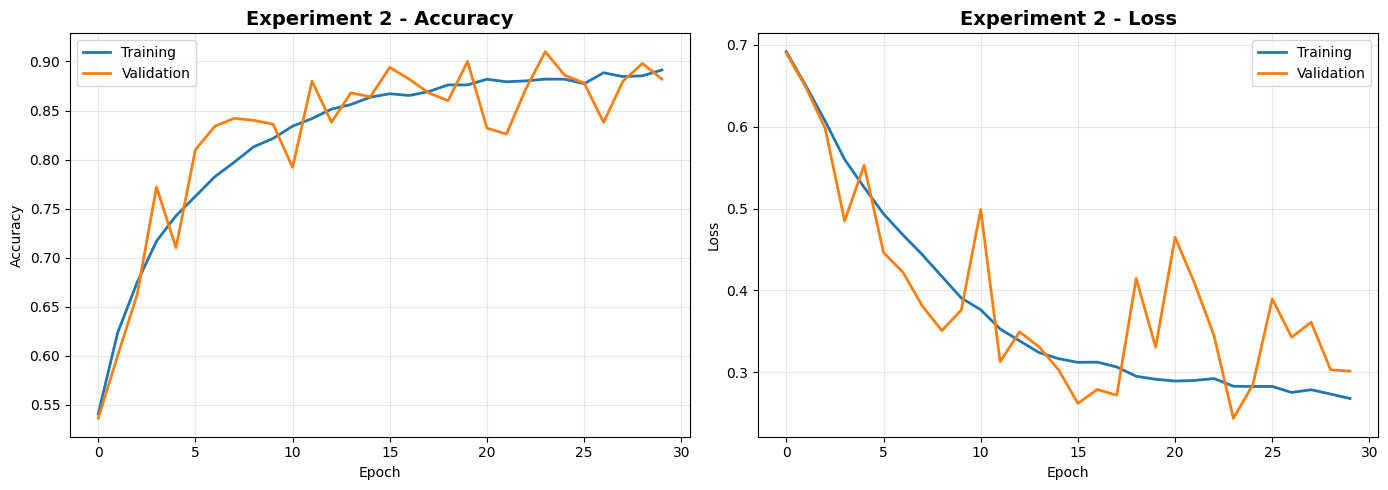

In [ ]:
training_size = 10000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_10000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    files_per_category_training = training_size // 2
    files_per_category_test = test_size // 2
    files_per_category_val = val_size // 2

    training_files = all_training_files[:files_per_category_training]
    test_files = all_training_files[files_per_category_training:files_per_category_training + files_per_category_test]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:files_per_category_val]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'training', category, fname))

    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'test', category, fname))

    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname),
                   os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'training'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'validation'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'test'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 2 RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 2: From Scratch - 10,000 samples',
    'training_size': 10000,
    'model_type': 'scratch',
    'test_accuracy': test_acc,
    'test_loss': test_loss,
    'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']),
    'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 2 - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 2 - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

======================================================

Experiment 3a - FROM SCRATCH WITH 5,000 SAMPLES

======================================================

Dataset created: 5000 training, 500 val, 500 test
Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5263 - loss: 0.7019 - val_accuracy: 0.6180 - val_loss: 0.6856
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5483 - loss: 0.6932 - val_accuracy: 0.6460 - val_loss: 0.6539
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6032 - loss: 0.6614 - val_accuracy: 0.6080 - val_loss: 0.6389
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6499 - loss: 0.6297 - val_accuracy: 0.6520 - val_loss: 0.6227
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6845 - loss: 0.6056 - val_accuracy: 0.7220 - val_loss: 0.5473
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6979 - loss: 0.5750 - val_accuracy: 0.7140 - val_loss: 0.5493
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7385 - loss: 0.5437 - val_accuracy: 0.7320 - val_loss: 0.5365
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7346 - loss: 0.5426 - val_accu

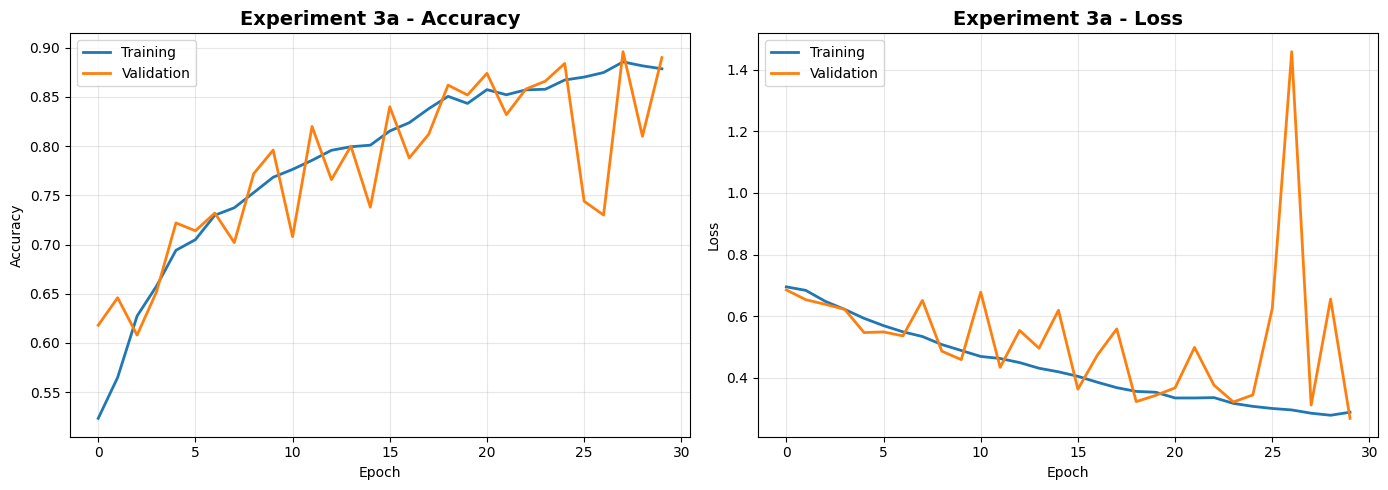

In [ ]:
training_size = 5000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_5000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3a RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3a: From Scratch - 5,000 samples',
    'training_size': 5000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3a - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3a - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=====================================================

Experiment 3b - FROM SCRATCH WITH 15,000 SAMPLES

=====================================================

Dataset created: 15000 training, 500 val, 500 test
Found 15000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.5425 - loss: 0.6884 - val_accuracy: 0.6720 - val_loss: 0.6008
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6666 - loss: 0.6142 - val_accuracy: 0.7040 - val_loss: 0.5536
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7094 - loss: 0.5629 - val_accuracy: 0.7460 - val_loss: 0.4980
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7548 - loss: 0.5086 - val_accuracy: 0.7880 - val_loss: 0.4632
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7839 - loss: 0.4622 - val_accuracy: 0.7580 - val_loss: 0.4972
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.4295 - val_accuracy: 0.8360 - val_loss: 0.3896
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8260 - loss: 0.3867 - val_accuracy: 0.8640 - val_loss: 0.2874
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8369 - loss: 0.3580 - 

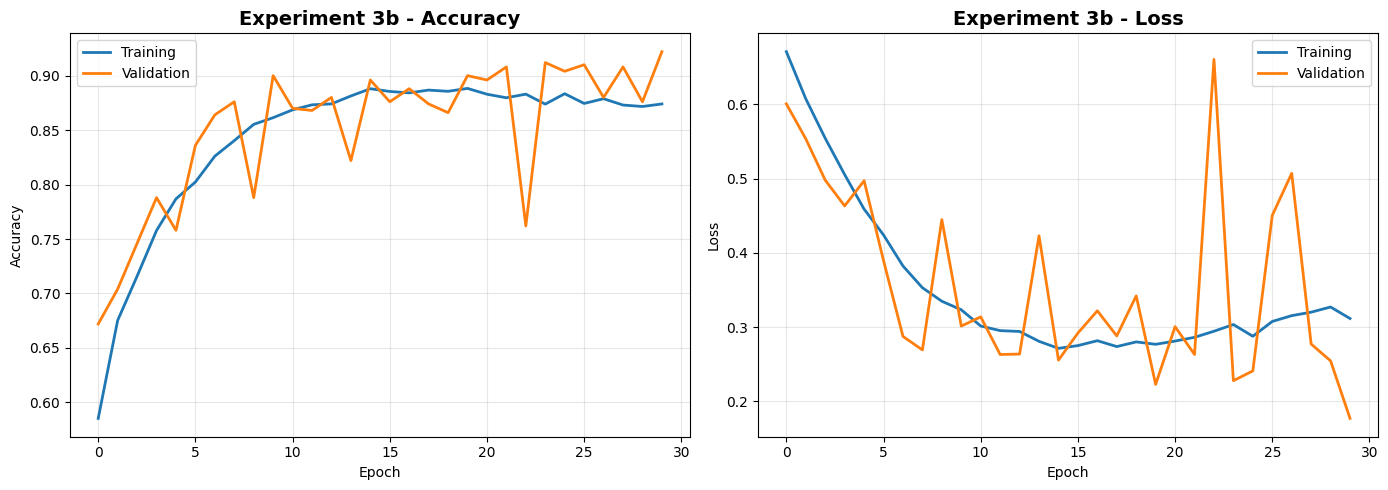

In [ ]:

training_size = 15000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_15000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3b RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3b: From Scratch - 15,000 samples',
    'training_size': 15000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3b - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3b - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

==========================================================

Experiment 3c - FROM SCRATCH WITH 20,000 SAMPLES

==========================================================

Dataset created: 20000 training, 500 val, 500 test
Found 20000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.5194 - loss: 0.6926 - val_accuracy: 0.6620 - val_loss: 0.5997
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6810 - loss: 0.6062 - val_accuracy: 0.6620 - val_loss: 0.6531
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7357 - loss: 0.5311 - val_accuracy: 0.8040 - val_loss: 0.4670
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7762 - loss: 0.4712 - val_accuracy: 0.8340 - val_loss: 0.3889
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7988 - loss: 0.4325 - val_accuracy: 0.8040 - val_loss: 0.4242
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8301 - loss: 0.3763 - val_accuracy: 0.8600 - val_loss: 0.3259
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8439 - loss: 0.3536 - val_accuracy: 0.8660 - val_loss: 0.2796
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8608 - loss: 0.3211 - 

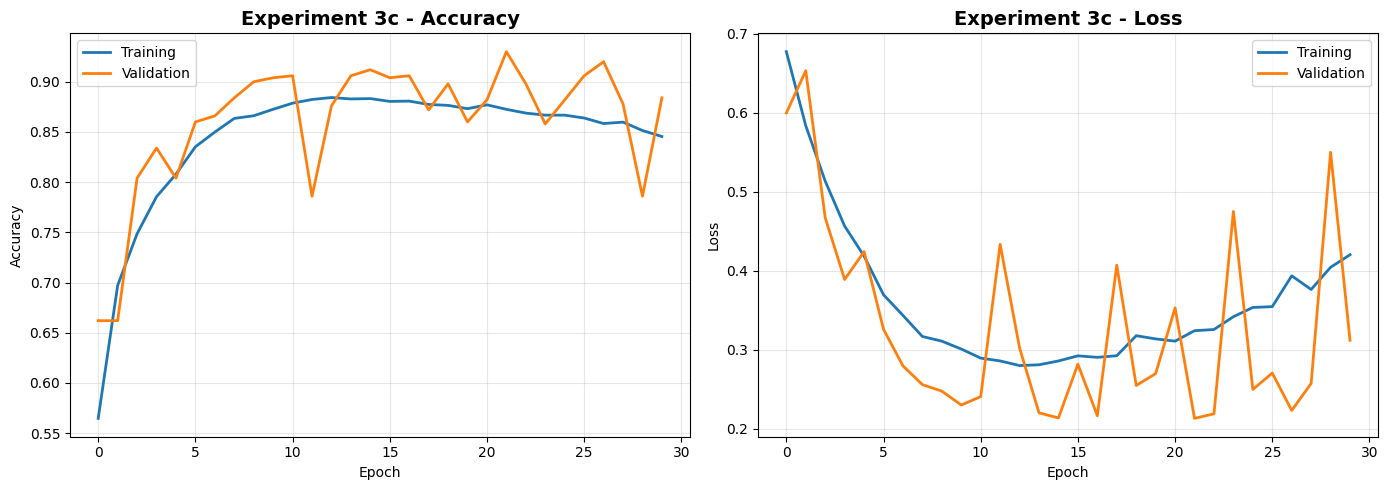

In [ ]:
training_size = 20000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_20000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3c RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3c: From Scratch - 20,000 samples',
    'training_size': 20000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3c - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3c - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

====================================================

Experiment 4a - PRETRAINED WITH 1,000 SAMPLES

====================================================

Dataset created: 1000 training, 500 val, 500 test
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.6433 - loss: 39.8948 - val_accuracy: 0.9400 - val_loss: 0.5050
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.8805 - loss: 0.6324 - val_accuracy: 0.9560 - val_loss: 0.2210
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8984 - loss: 0.3247 - val_accuracy: 0.9580 - val_loss: 0.2160
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.8734 - loss: 0.4145 - val_accuracy: 0.9380 - val_loss: 0.3061
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9325 - loss: 0.2123 - val_accuracy: 0.9560 - val_loss: 0.2231
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9409 - loss: 0.1843 - val_accuracy: 0.9260 - val_loss: 0.6122
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.9199 - loss: 0.3036 - val_accuracy: 0.9280 - val_loss: 0.6754
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.9371 - loss: 0.3301 - val_accuracy: 

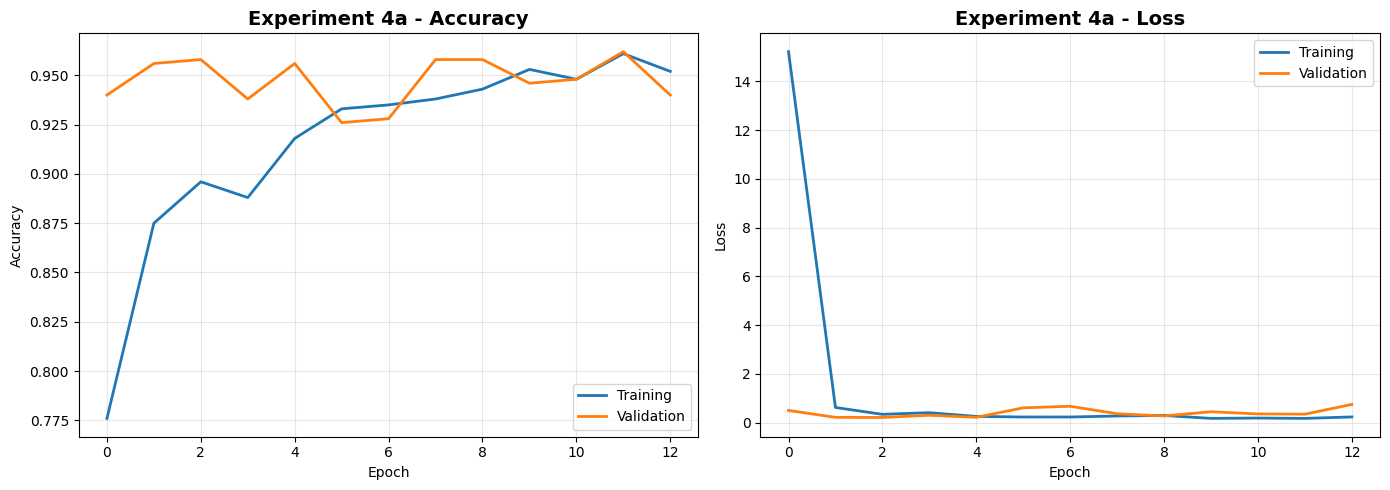

In [ ]:
training_size = 1000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_1000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

# Build pretrained model
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4a RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4a: Pretrained - 1,000 samples',
    'training_size': 1000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4a - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4a - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout();
plt.show()

=======================================================

Experiment 4b - PRETRAINED WITH 10,000 SAMPLES

=======================================================

Dataset created: 10000 training, 500 val, 500 test
Found 10000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 108ms/step - accuracy: 0.8453 - loss: 5.9855 - val_accuracy: 0.9500 - val_loss: 0.3987
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.9094 - loss: 0.3972 - val_accuracy: 0.9560 - val_loss: 0.2272
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9210 - loss: 0.3597 - val_accuracy: 0.9680 - val_loss: 0.3108
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9309 - loss: 0.2715 - val_accuracy: 0.9340 - val_loss: 0.4270
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.9285 - loss: 0.2760 - val_accuracy: 0.9640 - val_loss: 0.3537
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9355 - loss: 0.2457 - val_accuracy: 0.9460 - val_loss: 0.3527
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9362 - loss: 0.2397 - val_accuracy: 0.9660 - val_loss: 0.4017
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9439 - loss: 0

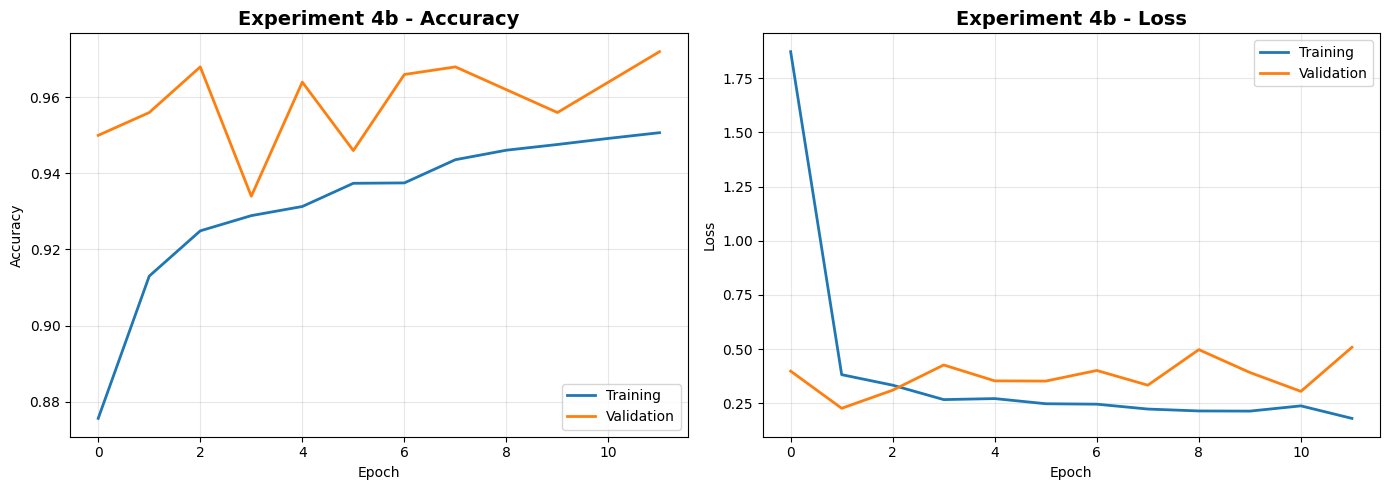

In [ ]:
training_size = 10000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_10000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4b RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4b: Pretrained - 10,000 samples',
    'training_size': 10000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4b - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4b - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

===================================================

Experiment 4c-i - PRETRAINED WITH 5,000 SAMPLES

===================================================

Dataset created: 5000 training, 500 val, 500 test
Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step - accuracy: 0.8007 - loss: 10.1988 - val_accuracy: 0.9440 - val_loss: 0.5025
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.8951 - loss: 0.4060 - val_accuracy: 0.9260 - val_loss: 0.4748
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9110 - loss: 0.3511 - val_accuracy: 0.9460 - val_loss: 0.4380
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9196 - loss: 0.3187 - val_accuracy: 0.9620 - val_loss: 0.2092
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9318 - loss: 0.2624 - val_accuracy: 0.9540 - val_loss: 0.4276
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9315 - loss: 0.2876 - val_accuracy: 0.9660 - val_loss: 0.2255
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9387 - loss: 0.2531 - val_accuracy: 0.9640 - val_loss: 0.3165
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9423 - loss: 

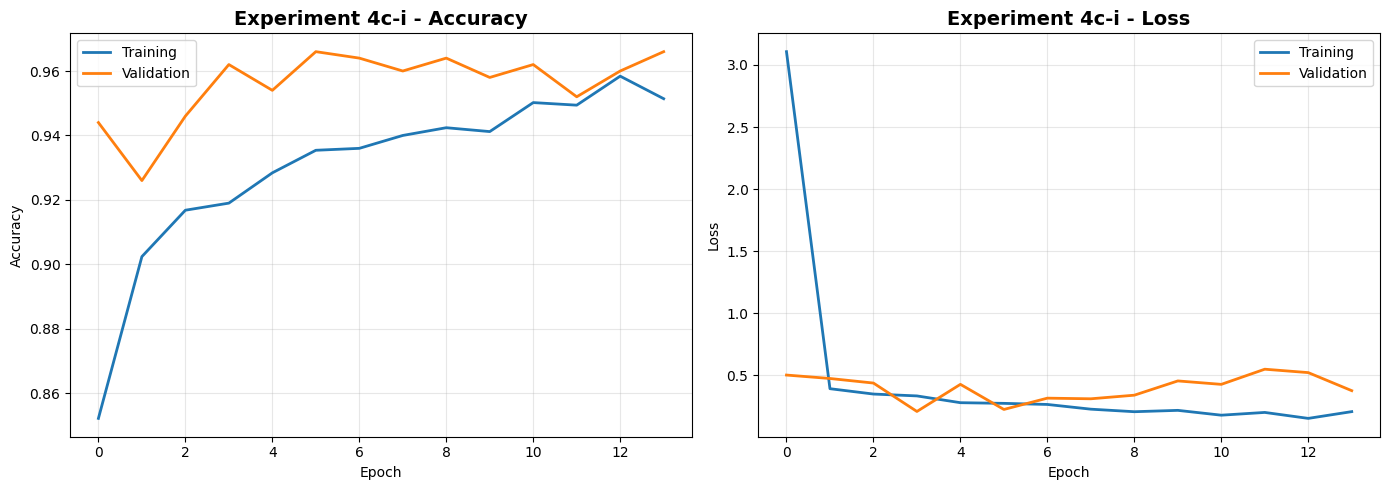

In [ ]:
training_size = 5000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_5000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4c-i RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4c-i: Pretrained - 5,000 samples',
    'training_size': 5000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4c-i - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4c-i - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

====================================================

Experiment 4c-ii - PRETRAINED WITH 15,000 SAMPLES

====================================================

Dataset created: 15000 training, 500 val, 500 test
Found 15000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 106ms/step - accuracy: 0.8609 - loss: 4.7555 - val_accuracy: 0.9460 - val_loss: 0.2935
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9180 - loss: 0.3221 - val_accuracy: 0.9620 - val_loss: 0.2370
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9255 - loss: 0.2972 - val_accuracy: 0.9680 - val_loss: 0.2466
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9405 - loss: 0.2241 - val_accuracy: 0.9620 - val_loss: 0.1655
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9370 - loss: 0.2299 - val_accuracy: 0.9680 - val_loss: 0.1981
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9395 - loss: 0.2243 - val_accuracy: 0.9700 - val_loss: 0.2329
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9427 - loss: 0.2216 - val_accuracy: 0.9620 - val_loss: 0.2688
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9491 - loss: 0

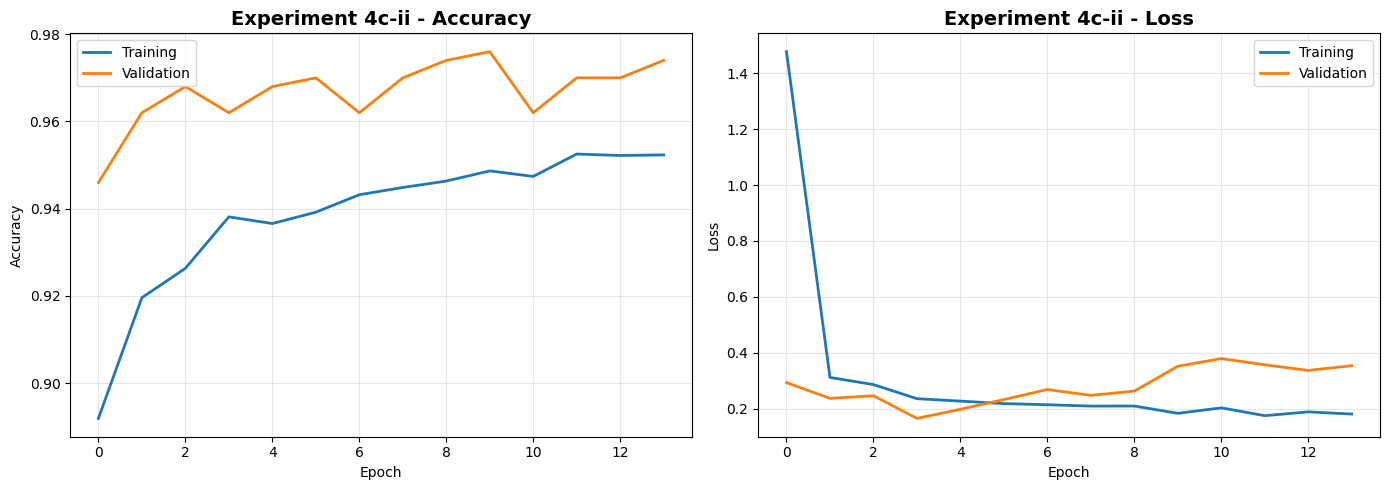

In [ ]:
training_size = 15000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_15000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4c-ii RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 4c-ii: Pretrained - 15,000 samples',
    'training_size': 15000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4c-ii - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4c-ii - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RESULTS SUMMARY

In [ ]:
import pandas as pd
from IPython.display import display
results_df = pd.DataFrame(results)

display(results_df[['experiment', 'training_size', 'model_type', 'test_accuracy']])

,experiment,training_size,model_type,test_accuracy
0,"Experiment 1: From Scratch - 1,000 samples",1000,scratch,0.696
1,"Experiment 2: From Scratch - 10,000 samples",10000,scratch,0.890
2,"Experiment 3a: From Scratch - 5,000 samples",5000,scratch,0.866
3,"Experiment 3b: From Scratch - 15,000 samples",15000,scratch,0.900
4,"Experiment 3c: From Scratch - 20,000 samples",20000,scratch,0.930
5,"Experiment 4a: Pretrained - 1,000 samples",1000,pretrained,0.942
6,"Experiment 4b: Pretrained - 10,000 samples",10000,pretrained,0.974
7,"Experiment 4c-i: Pretrained - 5,000 samples",5000,pretrained,0.968
8,"Experiment 4c-ii: Pretrained - 15,000 samples",15000,pretrained,0.958


================================

Performance Comparison

================================

In [ ]:
scratch_models = results_df[results_df['model_type'] == 'scratch'].copy()
pretrained_models = results_df[results_df['model_type'] == 'pretrained'].copy()

best_scratch = scratch_models.loc[scratch_models['test_accuracy'].idxmax()]
best_pretrained = pretrained_models.loc[pretrained_models['test_accuracy'].idxmax()]

print("\n1. OPTIMAL TRAINING SIZES:")
print(f"\n   FROM SCRATCH MODEL:")
print(f"   - Optimal Training Size: {int(best_scratch['training_size'])} samples")
print(f"   - Test Accuracy: {best_scratch['test_accuracy']*100:.2f}%")
print(f"   - Test Loss: {best_scratch['test_loss']:.4f}")
print(f"   - Experiment: {best_scratch['experiment']}")

print(f"\n   PRETRAINED MODEL:")
print(f"   - Optimal Training Size: {int(best_pretrained['training_size'])} samples")
print(f"   - Test Accuracy: {best_pretrained['test_accuracy']*100:.2f}%")
print(f"   - Test Loss: {best_pretrained['test_loss']:.4f}")
print(f"   - Experiment: {best_pretrained['experiment']}")

print("\n2. IMPACT OF TRAINING DATA SIZE (1,000 vs 10,000 samples):")

scratch_1k = results_df[(results_df['model_type'] == 'scratch') &
                         (results_df['training_size'] == 1000)]['test_accuracy'].values[0]
scratch_10k = results_df[(results_df['model_type'] == 'scratch') &
                          (results_df['training_size'] == 10000)]['test_accuracy'].values[0]
pretrained_1k = results_df[(results_df['model_type'] == 'pretrained') &
                            (results_df['training_size'] == 1000)]['test_accuracy'].values[0]
pretrained_10k = results_df[(results_df['model_type'] == 'pretrained') &
                             (results_df['training_size'] == 10000)]['test_accuracy'].values[0]

print(f"\n   FROM SCRATCH:")
print(f"   - 1,000 samples: {scratch_1k*100:.2f}%")
print(f"   - 10,000 samples: {scratch_10k*100:.2f}%")
print(f"   - Improvement: +{(scratch_10k - scratch_1k)*100:.2f} percentage points " +
      f"({((scratch_10k - scratch_1k)/scratch_1k*100):.1f}% relative increase)")

print(f"\n   PRETRAINED:")
print(f"   - 1,000 samples: {pretrained_1k*100:.2f}%")
print(f"   - 10,000 samples: {pretrained_10k*100:.2f}%")
print(f"   - Improvement: +{(pretrained_10k - pretrained_1k)*100:.2f} percentage points " +
      f"({((pretrained_10k - pretrained_1k)/pretrained_1k*100):.1f}% relative increase)")

print("\n3. FROM SCRATCH VS PRETRAINED COMPARISON:")

sample_sizes = sorted(results_df['training_size'].unique())

for size in sample_sizes:
    scratch_acc = results_df[(results_df['training_size'] == size) &
                              (results_df['model_type'] == 'scratch')]['test_accuracy'].values
    pretrained_acc = results_df[(results_df['training_size'] == size) &
                                 (results_df['model_type'] == 'pretrained')]['test_accuracy'].values

    if len(scratch_acc) > 0 and len(pretrained_acc) > 0:
        diff = pretrained_acc[0] - scratch_acc[0]
        advantage = "Pretrained" if diff > 0 else "From Scratch"

        print(f"\n   Training Size: {int(size):,} samples")
        print(f"   - From Scratch:  {scratch_acc[0]*100:.2f}%")
        print(f"   - Pretrained:    {pretrained_acc[0]*100:.2f}%")
        print(f"   - Advantage:     {advantage} by {abs(diff)*100:.2f} percentage points")


1. OPTIMAL TRAINING SIZES:

   FROM SCRATCH MODEL:
   - Optimal Training Size: 20000 samples
   - Test Accuracy: 93.00%
   - Test Loss: 0.1536
   - Experiment: Experiment 3c: From Scratch - 20,000 samples

   PRETRAINED MODEL:
   - Optimal Training Size: 10000 samples
   - Test Accuracy: 97.40%
   - Test Loss: 0.1135
   - Experiment: Experiment 4b: Pretrained - 10,000 samples

2. IMPACT OF TRAINING DATA SIZE (1,000 vs 10,000 samples):

   FROM SCRATCH:
   - 1,000 samples: 69.60%
   - 10,000 samples: 89.00%
   - Improvement: +19.40 percentage points (27.9% relative increase)

   PRETRAINED:
   - 1,000 samples: 94.20%
   - 10,000 samples: 97.40%
   - Improvement: +3.20 percentage points (3.4% relative increase)

3. FROM SCRATCH VS PRETRAINED COMPARISON:

   Training Size: 1,000 samples
   - From Scratch:  69.60%
   - Pretrained:    94.20%
   - Advantage:     Pretrained by 24.60 percentage points

   Training Size: 5,000 samples
   - From Scratch:  86.60%
   - Pretrained:    96.80%
   - 

===============================

Performance Comparison

===============================

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

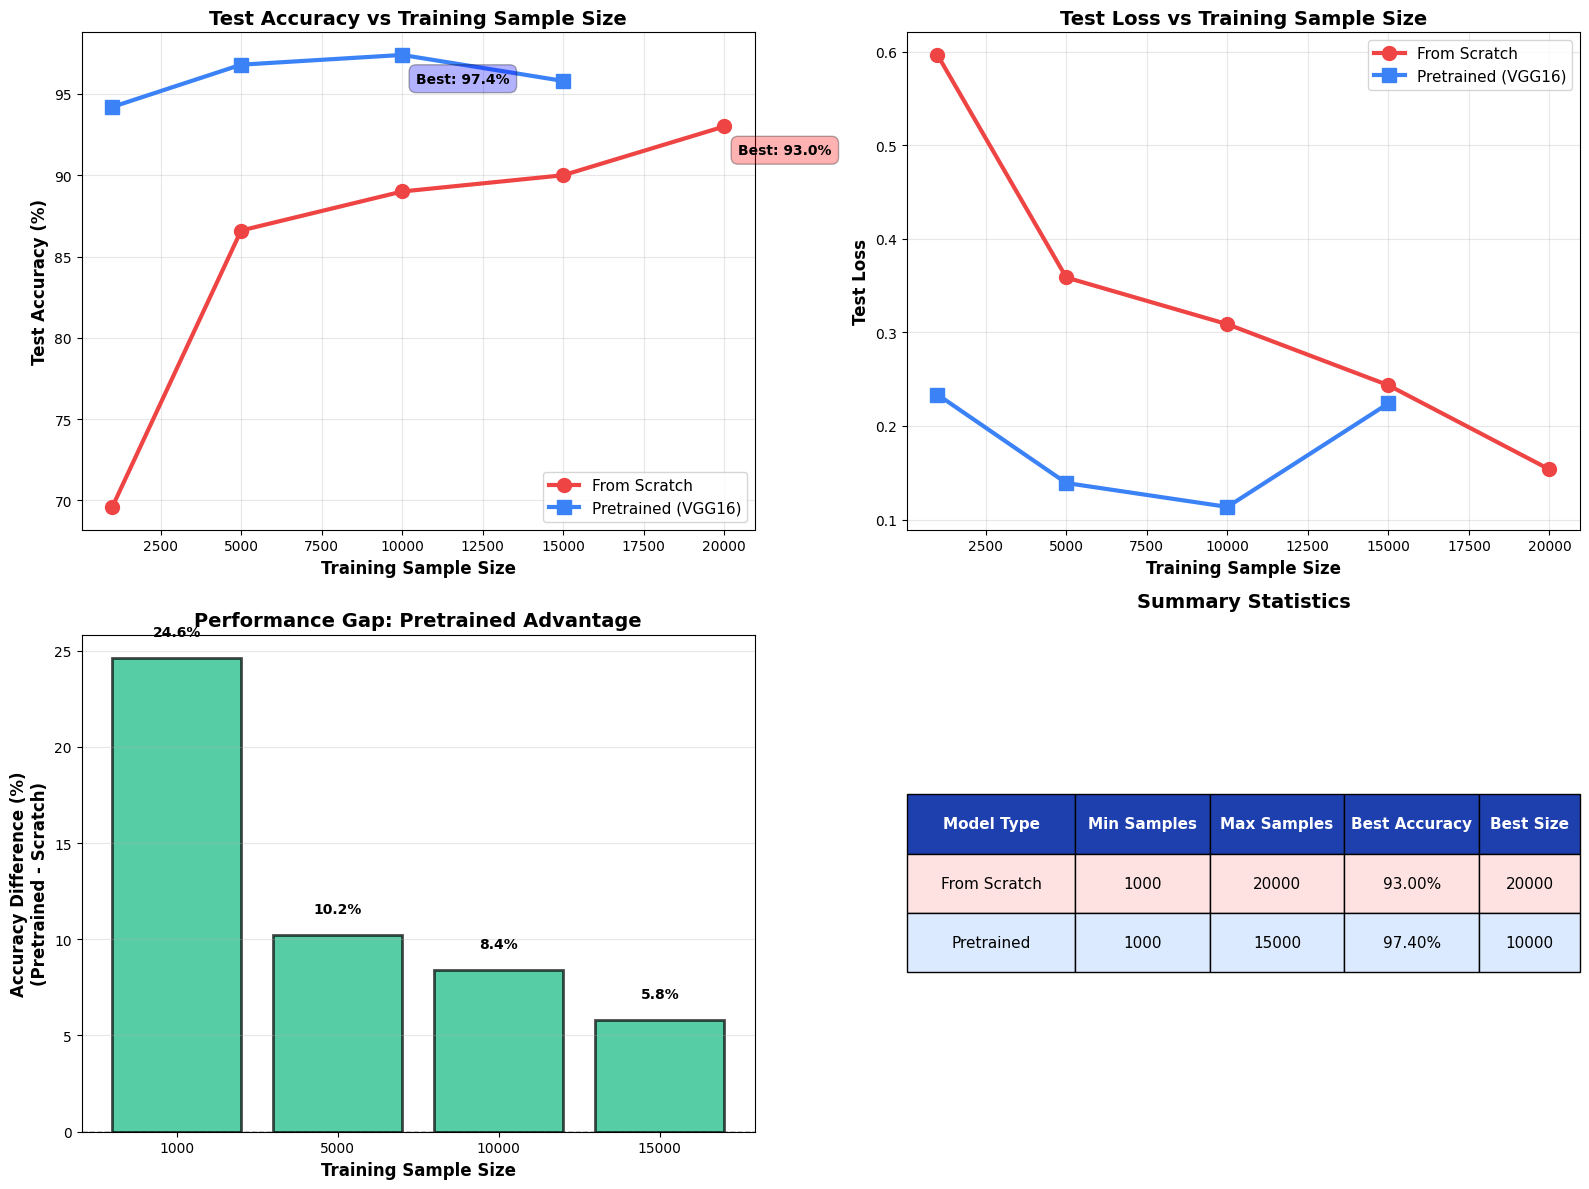

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Test Accuracy vs Training Size
ax1 = axes[0, 0]
scratch_data = scratch_models.sort_values('training_size')
pretrained_data = pretrained_models.sort_values('training_size')

ax1.plot(scratch_data['training_size'], scratch_data['test_accuracy']*100,
         'o-', linewidth=3, markersize=10, label='From Scratch', color='#ef4444')
ax1.plot(pretrained_data['training_size'], pretrained_data['test_accuracy']*100,
         's-', linewidth=3, markersize=10, label='Pretrained (VGG16)', color='#3b82f6')

ax1.set_xlabel('Training Sample Size', fontsize=12, fontweight='bold')
ax1.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Test Accuracy vs Training Sample Size', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax1.annotate(f'Best: {best_scratch["test_accuracy"]*100:.1f}%',
            xy=(best_scratch['training_size'], best_scratch['test_accuracy']*100),
            xytext=(10, -20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.3),
            fontsize=10, fontweight='bold')

ax1.annotate(f'Best: {best_pretrained["test_accuracy"]*100:.1f}%',
            xy=(best_pretrained['training_size'], best_pretrained['test_accuracy']*100),
            xytext=(10, -20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='blue', alpha=0.3),
            fontsize=10, fontweight='bold')

# Plot 2: Test Loss vs Training Size
ax2 = axes[0, 1]
ax2.plot(scratch_data['training_size'], scratch_data['test_loss'],
         'o-', linewidth=3, markersize=10, label='From Scratch', color='#ef4444')
ax2.plot(pretrained_data['training_size'], pretrained_data['test_loss'],
         's-', linewidth=3, markersize=10, label='Pretrained (VGG16)', color='#3b82f6')

ax2.set_xlabel('Training Sample Size', fontsize=12, fontweight='bold')
ax2.set_ylabel('Test Loss', fontsize=12, fontweight='bold')
ax2.set_title('Test Loss vs Training Sample Size', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Plot 3: Performance Gap
ax3 = axes[1, 0]

common_sizes = set(scratch_data['training_size']) & set(pretrained_data['training_size'])
gaps = []
sizes = []
for size in sorted(common_sizes):
    scratch_acc = scratch_data[scratch_data['training_size']==size]['test_accuracy'].values[0]
    pretrained_acc = pretrained_data[pretrained_data['training_size']==size]['test_accuracy'].values[0]
    gap = (pretrained_acc - scratch_acc) * 100
    gaps.append(gap)
    sizes.append(size)

colors = ['#10b981' if g > 0 else '#ef4444' for g in gaps]
ax3.bar(range(len(sizes)), gaps, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_xticks(range(len(sizes)))
ax3.set_xticklabels([f'{int(s)}' for s in sizes])
ax3.set_xlabel('Training Sample Size', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accuracy Difference (%)\n(Pretrained - Scratch)', fontsize=12, fontweight='bold')
ax3.set_title('Performance Gap: Pretrained Advantage', fontsize=14, fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax3.grid(True, alpha=0.3, axis='y')

for i, (size, gap) in enumerate(zip(sizes, gaps)):
    ax3.text(i, gap + (1 if gap > 0 else -1), f'{gap:.1f}%',
            ha='center', va='bottom' if gap > 0 else 'top',
            fontweight='bold', fontsize=10)

# Plot 4: Summary Statistics Table
ax4 = axes[1, 1]
ax4.axis('tight')
ax4.axis('off')

table_data = []
table_data.append(['Model Type', 'Min Samples', 'Max Samples', 'Best Accuracy', 'Best Size'])
table_data.append(['From Scratch',
                   f"{int(scratch_data['training_size'].min())}",
                   f"{int(scratch_data['training_size'].max())}",
                   f"{scratch_models['test_accuracy'].max()*100:.2f}%",
                   f"{int(best_scratch['training_size'])}"])
table_data.append(['Pretrained',
                   f"{int(pretrained_data['training_size'].min())}",
                   f"{int(pretrained_data['training_size'].max())}",
                   f"{pretrained_models['test_accuracy'].max()*100:.2f}%",
                   f"{int(best_pretrained['training_size'])}"])

table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.25, 0.20, 0.20, 0.20, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

for i in range(5):
    table[(0, i)].set_facecolor('#1e40af')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, 3):
    color = '#fee2e2' if i == 1 else '#dbeafe'
    for j in range(5):
        table[(i, j)].set_facecolor(color)

ax4.set_title('Summary Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt